In [25]:
# For data processing
import pandas as pd

# For numerical computing
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv("housing.csv") # Import dataset

In [27]:
# Print first 5 objects of dataset to understand its structure
data.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [28]:
data.info() # Check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [29]:
# You can see from info and missing values that total_bedrooms has null values
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [30]:
# Return a data frame with only non-null values by dropping missing values.
data.dropna(inplace = True) 

In [31]:
# Now each feature has the equal amount of non-null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [32]:
# Ocean proximity consists of string objects, not numbers.
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [33]:
# Map each ocean proximity string value to a number so it can be read in calculations.
prox_mapping = {'<1H OCEAN': 1,'INLAND': 2,'NEAR OCEAN': 3,'NEAR BAY':4,'ISLAND':5}
data['ocean_proximity'] = data['ocean_proximity'].map(prox_mapping)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'ocean_proximity'}>, <Axes: >, <Axes: >]],
      dtype=object)

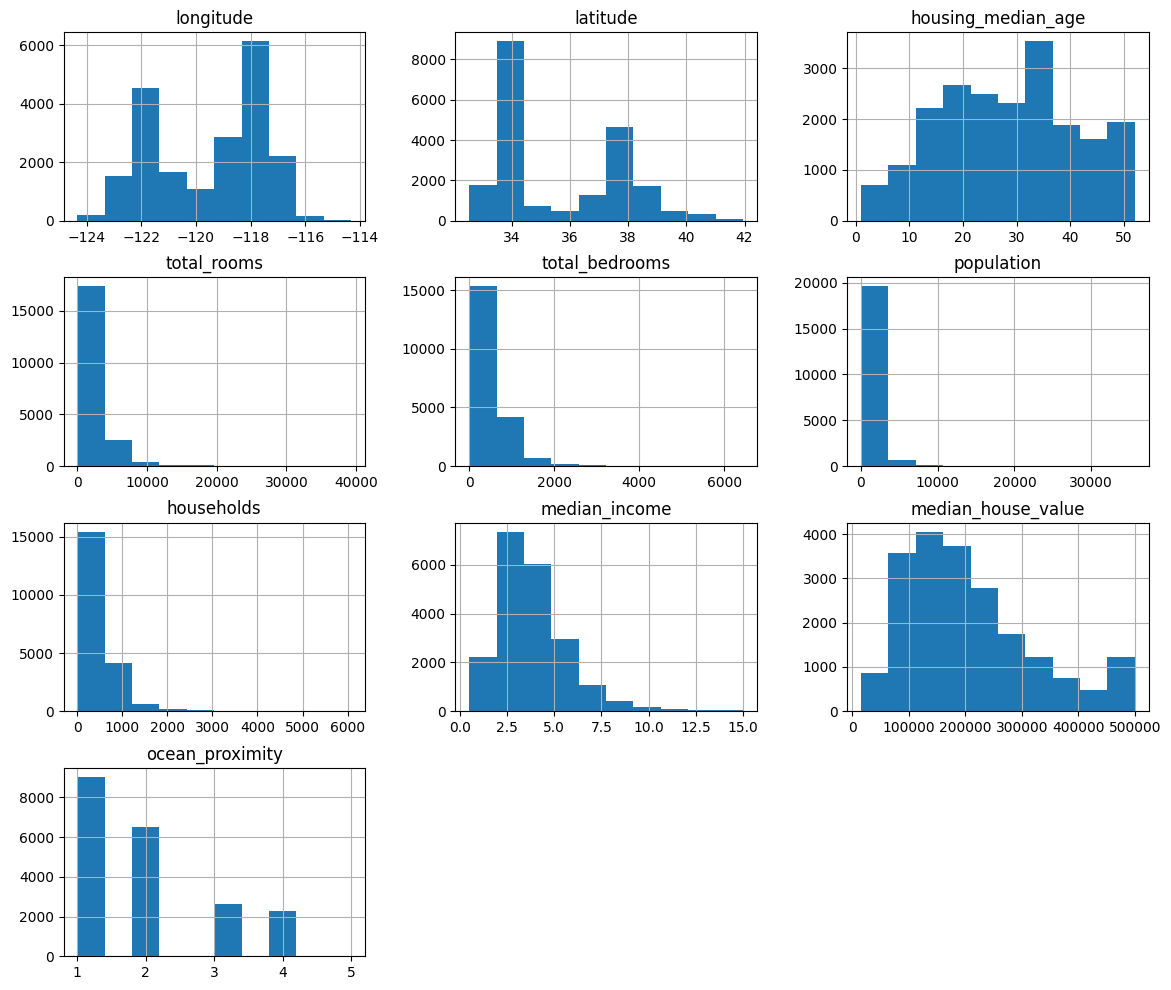

In [34]:
# Display histogram for each feature.
data.hist(figsize = (14, 12))

<Axes: >

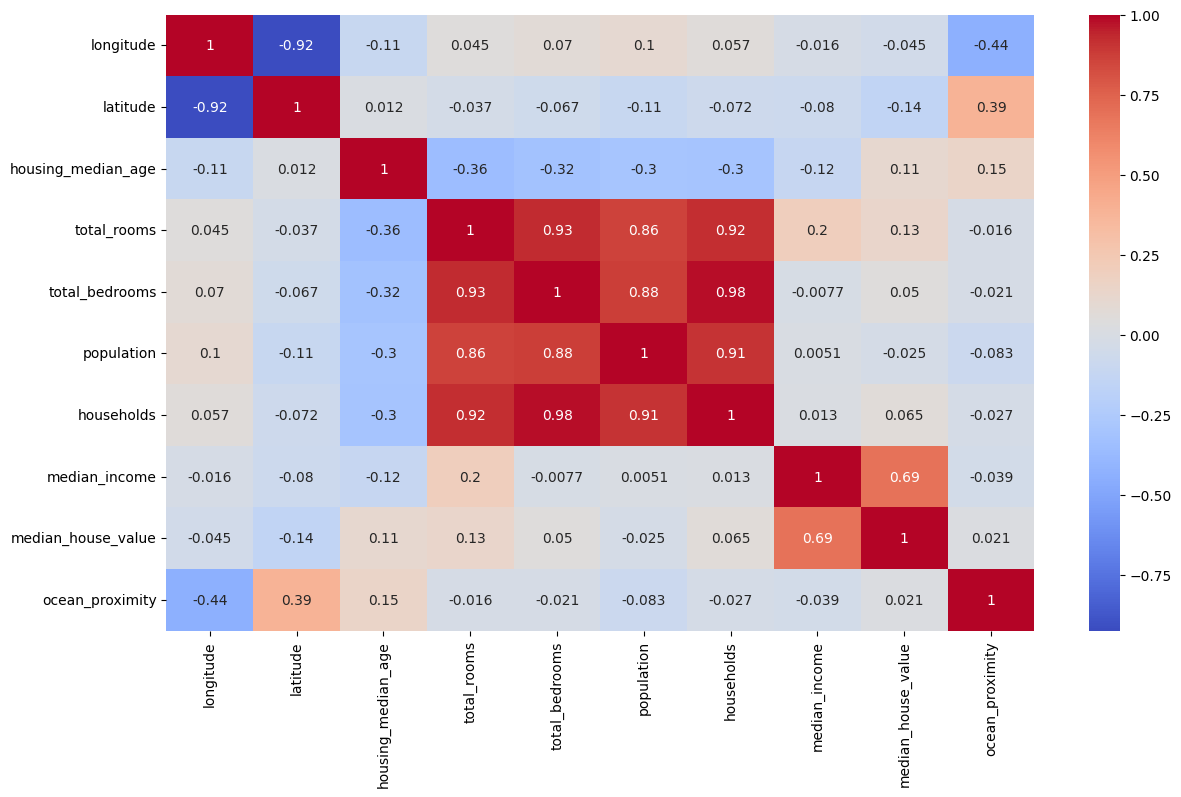

In [35]:
# Display a heatmap.
plt.figure(figsize = (14, 8))
sns.heatmap(data.corr(numeric_only = True), annot = True, cmap = "coolwarm")

<Axes: xlabel='latitude', ylabel='longitude'>

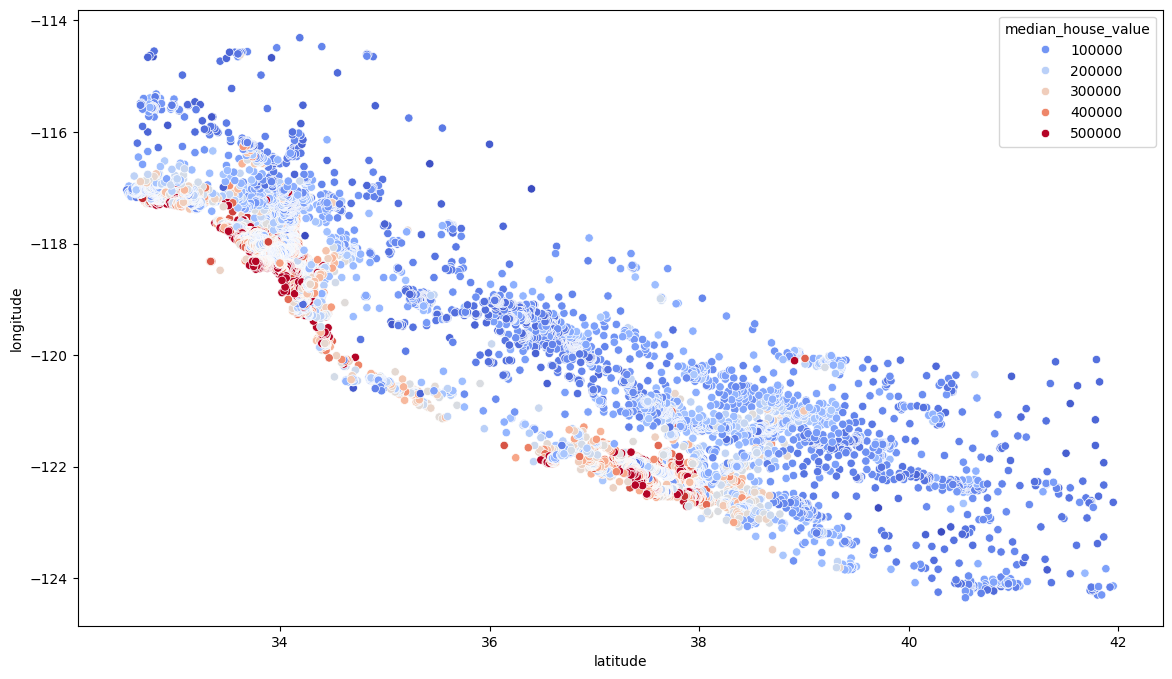

In [36]:
# Display scatterplot.
plt.figure(figsize = (14, 8))
sns.scatterplot(x = "latitude", y = "longitude", data = data, hue = "median_house_value", palette = "coolwarm")

In [37]:
# Import module for training x and y
from sklearn.model_selection import train_test_split

# Import linear regression model
from sklearn.linear_model import LinearRegression

# r2 or r squared is coefficient of determination
from sklearn.metrics import r2_score

# Import mean squared error module
from sklearn.metrics import mean_squared_error

# X is the data frame without the target variable. Axis 1 is the column to be dropped.
# This means all features will be used except the target variable.
X = data.drop(['median_house_value'], axis = 1)

# y is the data frame with only the target variable.
y = data['median_house_value']

# When using 1 feature for x (median income)
#X = data[['median_income']].values.reshape(-1, 1)
#y = data[['median_house_value']].values.reshape(-1, 1)

In [38]:
# Set up training for x and y. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)

In [39]:
# Initialize and train the linear regression model
linRegModel = LinearRegression()
linRegModel.fit(X_train, y_train)

LinearRegression()

In [40]:
# Make the prediction from the model.
LR_y_pred = linRegModel.predict(X_test)


# Calculate MSE and r^2 score for training and testing data.
LR_mse = (mean_squared_error(y_test, LR_y_pred))
LR_training_score = linRegModel.score(X_train, y_train)
LR_testing_score = linRegModel.score(X_test, y_test)

# Array of all the coefficients for each feature
LR_coeff = linRegModel.coef_

# Make table of features and their corresponding coefficients
coefficients = pd.Series(LR_coeff, index = X.columns)

# Print metrics
print("Coefficients:\n", coefficients)
print("\nTraining score: ", LR_training_score) 
print("Testing score: ", LR_testing_score) 
print("Mean squared error: ", LR_mse)

Coefficients:
 longitude            -43237.218152
latitude             -42706.324412
housing_median_age     1179.607181
total_rooms              -8.094828
total_bedrooms          116.037210
population              -37.198731
households               42.528698
median_income         40191.263577
ocean_proximity       -1290.578172
dtype: float64

Training score:  0.6330547583324257
Testing score:  0.6483709521842406
Mean squared error:  4817107441.883649


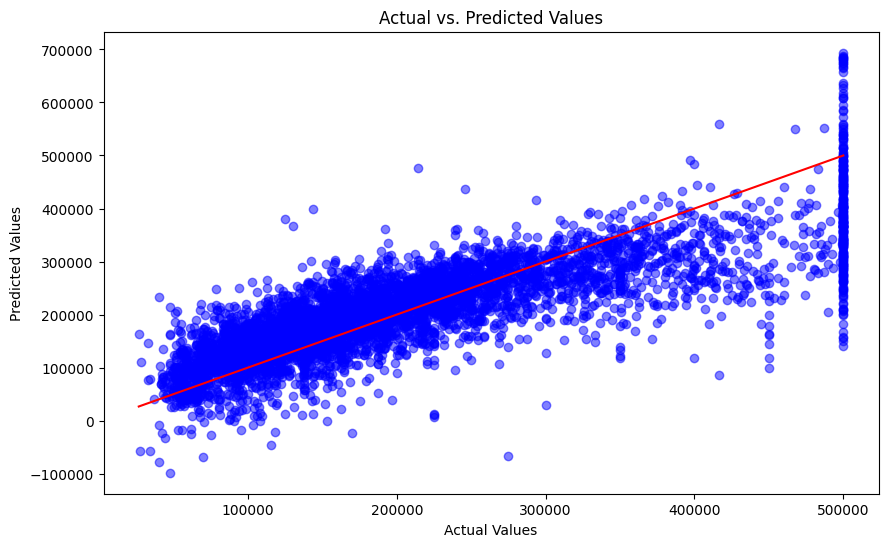

In [41]:
# Display actual vs predicted plot for all features
plt.figure(figsize=(10, 6))
plt.scatter(y_test, LR_y_pred, alpha = 0.5, color = 'blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [42]:
# Import random forest regression model
from sklearn.ensemble import RandomForestRegressor

# Initialize the random forest model and then train it
RF_model = RandomForestRegressor(n_estimators = 100, random_state = 1)
RF_model.fit(X_train, y_train)

# Make predictions
RF_y_pred = RF_model.predict(X_test)

# Calculate metrics
RF_mse = mean_squared_error(y_test, RF_y_pred)
RF_training_score = RF_model.score(X_train, y_train)
RF_testing_score = RF_model.score(X_test, y_test)

# Print metrics
print("Training Score: ", RF_training_score) 
print("Testing score: ", RF_testing_score) 
print("Mean squared error: ", RF_mse)

Training Score:  0.9736539937889798
Testing score:  0.8278615503227298
Mean squared error:  2358193704.7736936


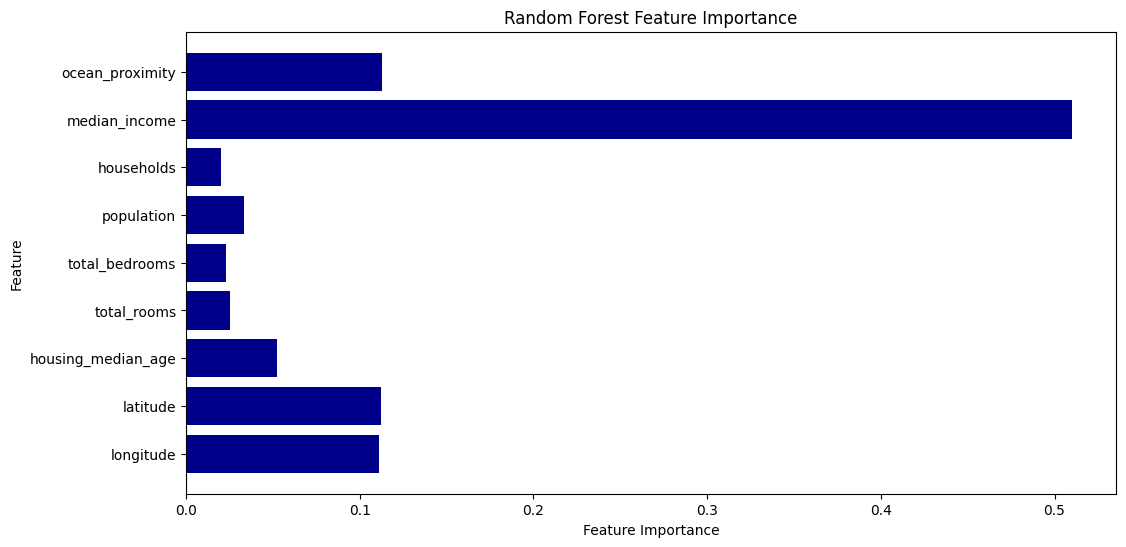

In [43]:
# Retrieve feature importance values from the model
RF_feature_importances = RF_model.feature_importances_

# Create a data frame for feature importance
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": RF_feature_importances})

# Display the feature importance for the random forest model
plt.figure(figsize=(12, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="darkblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()

In [44]:
# Import decision tree regression model
from sklearn.tree import DecisionTreeRegressor, plot_tree

# Initalize decision tree model and train it
DT_model = DecisionTreeRegressor(random_state = 1, max_depth = 10)
DT_model.fit(X_train, y_train)

# Make predictions
DT_y_pred = DT_model.predict(X_test)

# Calculate metrics
DT_mse = mean_squared_error(y_test, DT_y_pred)
DT_training_score = DT_model.score(X_train, y_train)
DT_testing_score = DT_model.score(X_test, y_test)

# Print metrics
print("Training Score: ", DT_training_score) #cod for training
print("Testing score: ", DT_testing_score) #cod (r^2) for testing data
print("Mean squared error: ", DT_mse)

Training Score:  0.8437183473211229
Testing score:  0.7403691574998144
Mean squared error:  3556787106.523322


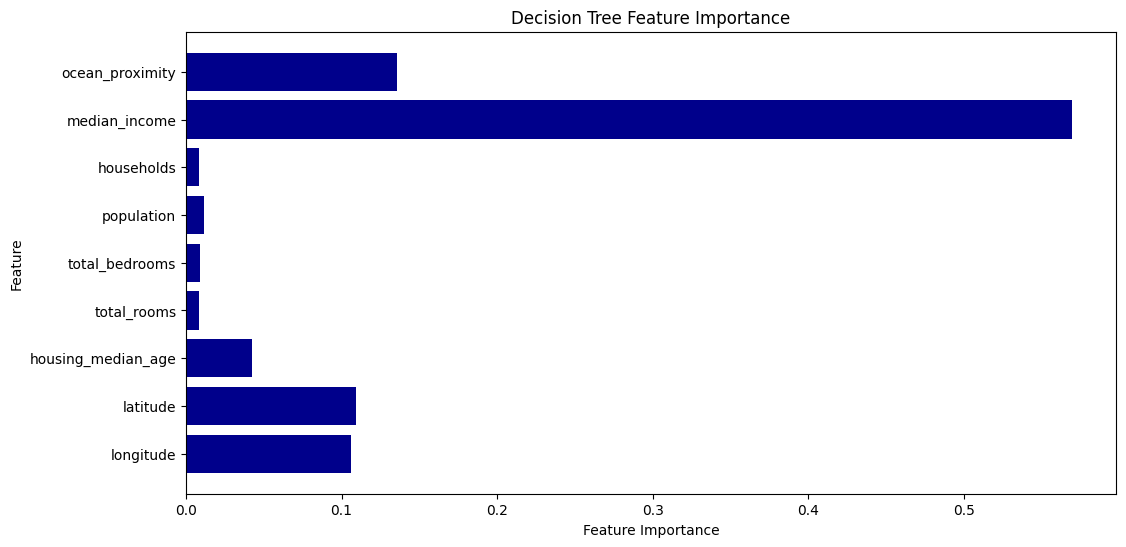

In [45]:
# Retrieve feature importance values from the model
DT_feature_importances = DT_model.feature_importances_

# Create a data frame for feature importance
important_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": DT_feature_importances})

# Display the feature importance for the decision tree model
plt.figure(figsize=(12, 6))
plt.barh(important_df["Feature"], important_df["Importance"], color="darkblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()